<a href="https://colab.research.google.com/github/sirjit2/AIclass/blob/main/Worksheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1 - imports and version checks
import pandas as pd            # main library for DataFrame work
import numpy as np             # numerical helpers
import matplotlib.pyplot as plt # for plots (worksheet references matplotlib)
pd.__version__, np.__version__


('2.2.2', '2.0.2')

In [ ]:

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/AI/Titanic-Dataset.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Cell 3 - DataFrame info (columns, types, missing values)
if df is None:
    raise SystemExit("No dataset loaded. Please upload or mount Drive and re-run cell 2.")
print("Shape (rows, columns):", df.shape)
print("\nDataFrame info:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum())


Shape (rows, columns): (891, 12)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


section2


In [ ]:
# Cell 4 - Problem 1 (Sorting)
# 1. DataFrame 'fare' containing only Fare column
fare = df[['Fare']].copy()
print("fare.head():")
display(fare.head())

# 2. DataFrame 'class_age' containing Pclass then Age (in that order)
class_age = df[['Pclass', 'Age']].copy()
print("\nclass_age.head():")
display(class_age.head())

# 3. DataFrame 'survived_gender' containing Survived then Sex
survived_gender = df[['Survived', 'Sex']].copy()
print("\nsurvived_gender.head():")
display(survived_gender.head())


fare.head():


,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500



class_age.head():


,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0



survived_gender.head():


,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [ ]:
# Cell 5 - Problem 2 (Subsetting rows and categorical filters)
# 1. fare_gt_100: fare > 100
fare_gt_100 = df[df['Fare'] > 100]
print("fare_gt_100 (rows):", fare_gt_100.shape[0])
display(fare_gt_100.head())

# 2. first_class: Pclass == 1
first_class = df[df['Pclass'] == 1]
print("\nfirst_class (rows):", first_class.shape[0])
display(first_class.head())

# 3. female_under_18: Age < 18 and Sex == 'female'
female_under_18 = df[(df['Age'] < 18) & (df['Sex'] == 'female')]
print("\nfemale_under_18 (rows):", female_under_18.shape[0])
display(female_under_18.head())

# Subsetting by categorical variables:
# 1. embarked_c_or_s: Embarked is 'C' or 'S' (handle missing Embarked safely)
embarked_c_or_s = df[df['Embarked'].isin(['C', 'S'])]
print("\nembarked_c_or_s (rows):", embarked_c_or_s.shape[0])
display(embarked_c_or_s.head())

# 2. first_second_class: Pclass in [1,2]
first_second_class = df[df['Pclass'].isin([1,2])]
print("\nfirst_second_class (rows):", first_second_class.shape[0])
display(first_second_class.head())


fare_gt_100 (rows): 53


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C



first_class (rows): 216


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S



female_under_18 (rows): 55


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S



embarked_c_or_s (rows): 812


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



first_second_class (rows): 400


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
# Cell 6 - Handle missing Age by filling with median
median_age = df['Age'].median(skipna=True)
print("Median age (used to fill missing):", median_age)
df['Age'] = df['Age'].fillna(median_age)   # inplace replacement
print("Missing Age after fill:", df['Age'].isna().sum())


Median age (used to fill missing): 28.0
Missing Age after fill: 0


In [ ]:
# Cell 7 - Fare per year (Fare / Age) and find top entries with fare_per_year > 5
df['fare_per_year'] = df['Fare'] / df['Age']     # new column

# Subset rows where fare_per_year > 5
high_fare_age = df[df['fare_per_year'] > 5].copy()

# Sort descending by fare_per_year
high_fare_age_srt = high_fare_age.sort_values(by='fare_per_year', ascending=False)

# Select Name and fare_per_year as 'result'
result = high_fare_age_srt[['Name', 'fare_per_year']].reset_index(drop=True)
print("Passengers with fare_per_year > 5, sorted descending:")
display(result.head(15))


Passengers with fare_per_year > 5, sorted descending:


,Name,fare_per_year
0,"Allison, Master. Hudson Trevor",164.728261
1,"Allison, Miss. Helen Loraine",75.775000
2,"Goodwin, Master. Sidney Leonard",46.900000
3,"Panula, Master. Eino Viljami",39.687500
4,"Becker, Master. Richard F",39.000000
5,"Mallet, Master. Andre",37.004200
6,"Caldwell, Master. Alden Gates",34.939759
7,"Baclini, Miss. Eugenie",25.677733
8,"Baclini, Miss. Helene Barbara",25.677733
9,"Richards, Master. George Sibley",22.590361


In [ ]:
# Cell 8 - Fare per class (Fare / Pclass), restrict to adult males
df['fare_per_class'] = df['Fare'] / df['Pclass']

# Subset adult males
adult_males = df[(df['Sex'] == 'male') & (df['Age'] >= 18)].copy()

# Sort adult males descending by fare_per_class
adult_males_srt = adult_males.sort_values(by='fare_per_class', ascending=False)

# Select Name, Age, fare_per_class
result_adult_males = adult_males_srt[['Name', 'Age', 'fare_per_class']].reset_index(drop=True)
print("Top adult male passengers by fare_per_class:")
display(result_adult_males.head(15))


Top adult male passengers by fare_per_class:


,Name,Age,fare_per_class
0,"Lesurer, Mr. Gustave J",35.0,512.3292
1,"Cardeza, Mr. Thomas Drake Martinez",36.0,512.3292
2,"Fortune, Mr. Charles Alexander",19.0,263.0000
3,"Fortune, Mr. Mark",64.0,263.0000
4,"Baxter, Mr. Quigg Edmond",24.0,247.5208
5,"Robbins, Mr. Victor",28.0,227.5250
6,"Farthing, Mr. John",28.0,221.7792
7,"Widener, Mr. Harry Elkins",27.0,211.5000
8,"Graham, Mr. George Edward",38.0,153.4625
9,"Ringhini, Mr. Sante",22.0,135.6333


In [ ]:
# Cell 9 - Percent of total fare revenue by Pclass
total_fare = df['Fare'].sum()
fare_by_class = df.groupby('Pclass')['Fare'].sum().sort_index()  # index 1,2,3
proportion_by_class = fare_by_class / total_fare

print("Total fare:", total_fare)
print("\nFare totals by class:")
display(fare_by_class)

print("\nProportion (as fraction) by class:")
display(proportion_by_class)

print("\nProportion (as percentage) by class:")
display((proportion_by_class * 100).round(2))


Total fare: 28693.9493

Fare totals by class:


,Fare
Pclass,
1,18177.4125
2,3801.8417
3,6714.6951



Proportion (as fraction) by class:


,Fare
Pclass,
1,0.633493
2,0.132496
3,0.234011



Proportion (as percentage) by class:


,Fare
Pclass,
1,63.35
2,13.25
3,23.40


In [ ]:
# Cell 10 - Age group counts and percentages

# Create age_group column: child < 18, adult 18-64, senior 65+
def age_group_fn(age):
    if age < 18:
        return 'child'
    elif age >= 65:
        return 'senior'
    else:
        return 'adult'

df['age_group'] = df['Age'].apply(age_group_fn)

total_passengers = len(df)
counts_by_age_group = df['age_group'].value_counts().reindex(['child','adult','senior']).fillna(0).astype(int)

proportion_age_group = counts_by_age_group / total_passengers
percentage_age_group = (proportion_age_group * 100).round(2)

print("Total passengers:", total_passengers)
print("\nCounts by age group:")
display(counts_by_age_group)
print("\nPercentage by age group:")
display(percentage_age_group)


Total passengers: 891

Counts by age group:


,count
age_group,
child,113
adult,767
senior,11



Percentage by age group:


,count
age_group,
child,12.68
adult,86.08
senior,1.23


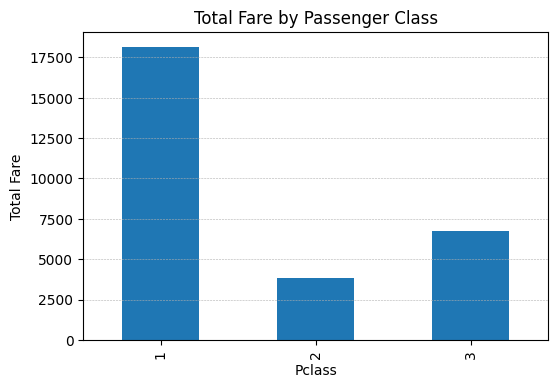

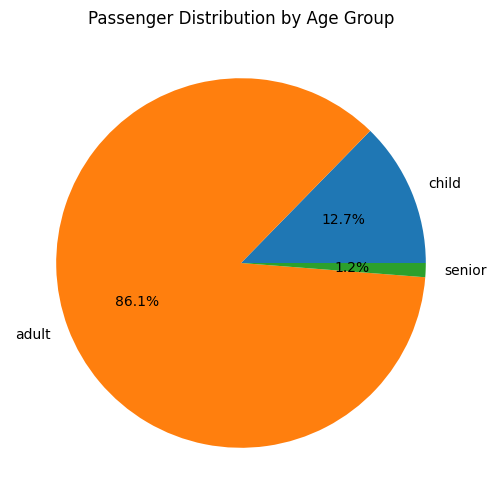

In [ ]:
# Cell 11 - Quick plots (Matplotlib)

# Bar chart for fare_by_class
plt.figure(figsize=(6,4))
fare_by_class.plot(kind='bar')
plt.title('Total Fare by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.grid(axis='y', linestyle='--', linewidth=0.4)
plt.show()

# Pie chart for age groups
plt.figure(figsize=(6,6))
percentage_age_group.plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Passenger Distribution by Age Group')
plt.show()


In [ ]:
# Cell 12 - Save outputs you might want to attach in submission
result.to_csv('high_fare_age_result.csv', index=False)            # from Cell 7
result_adult_males.to_csv('adult_males_fare_per_class.csv', index=False)  # from Cell 8
fare_by_class.to_csv('fare_by_class.csv')
counts_by_age_group.to_csv('counts_by_age_group.csv')

print("Saved files: high_fare_age_result.csv, adult_males_fare_per_class.csv, fare_by_class.csv, counts_by_age_group.csv")


Saved files: high_fare_age_result.csv, adult_males_fare_per_class.csv, fare_by_class.csv, counts_by_age_group.csv


In [ ]:
from google.colab import files
files.download('high_fare_age_result.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>